/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/468488180.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Alcohol', y='GPA', data=data, palette='muted', ax=axes[1])
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/468488180.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LowStudyTime', y='GPA', data=data, palette='Set2', ax=axes[2])
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/468488180.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Romance', y='GPA', data=data,

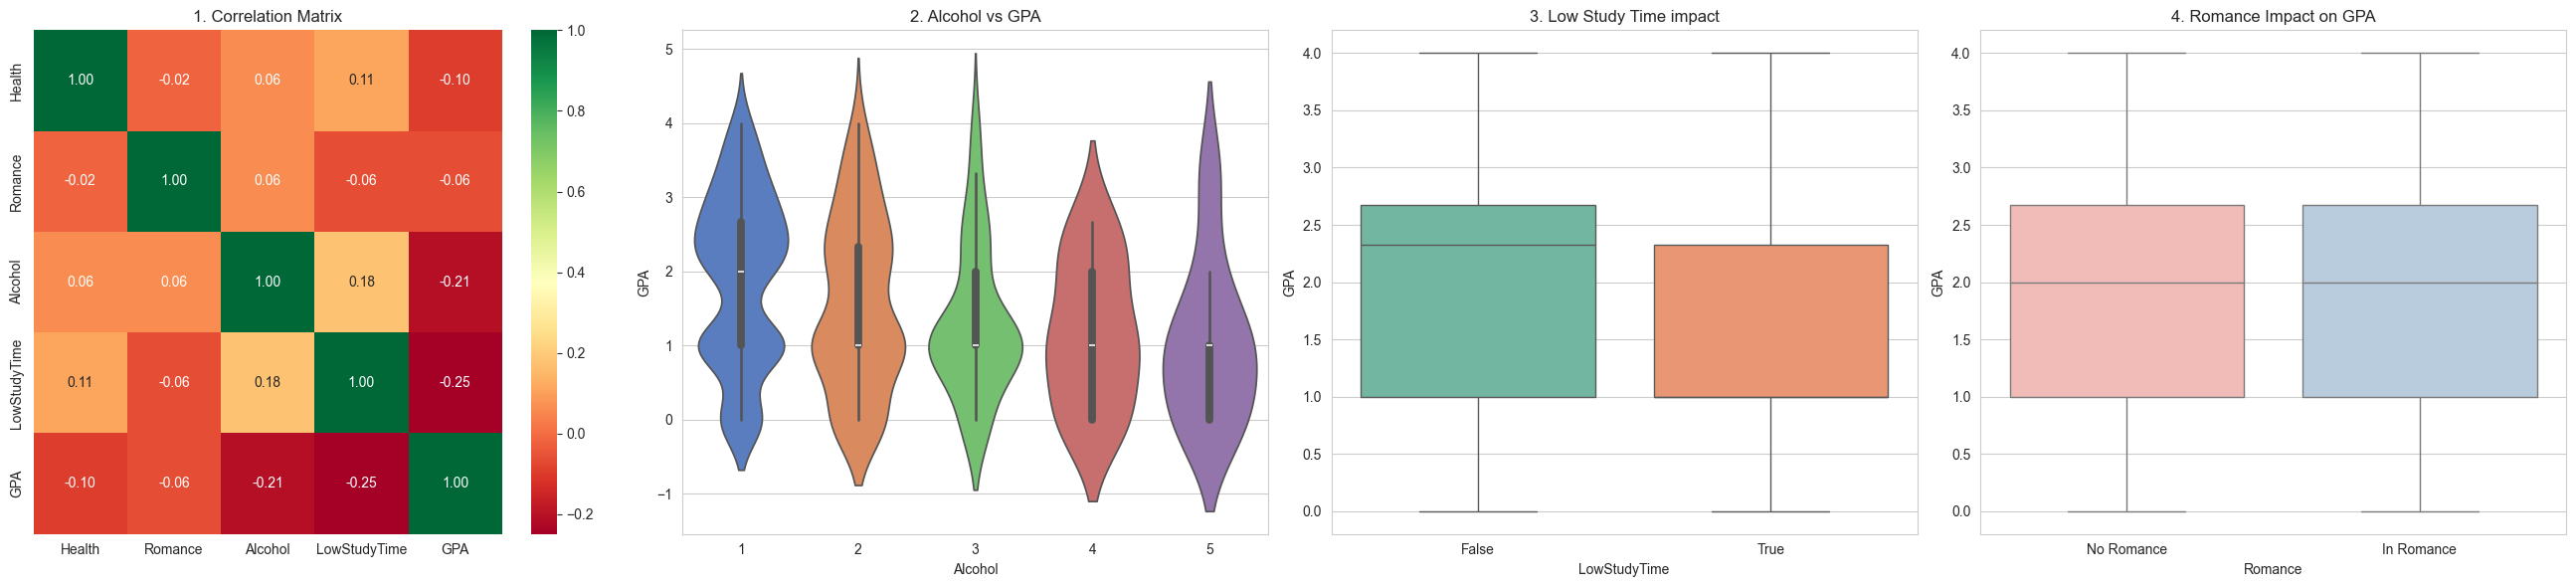

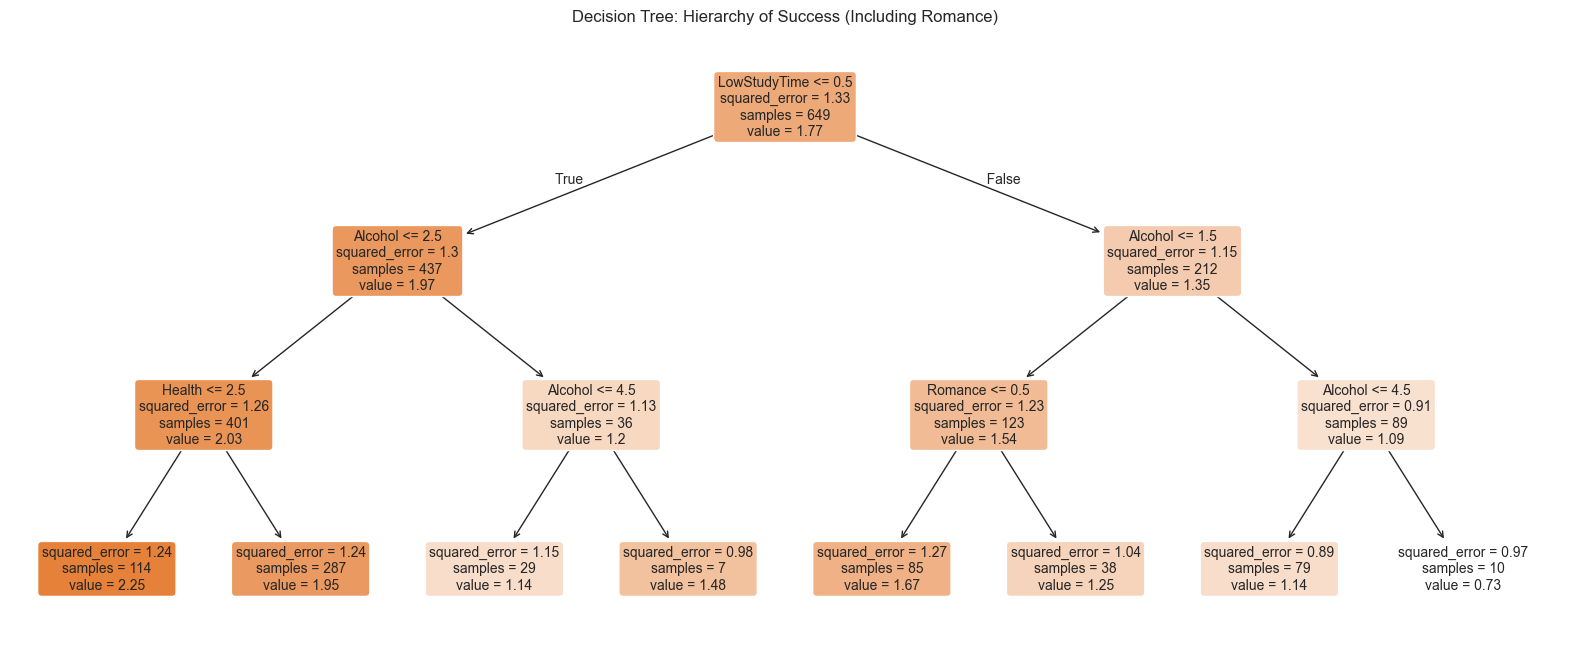

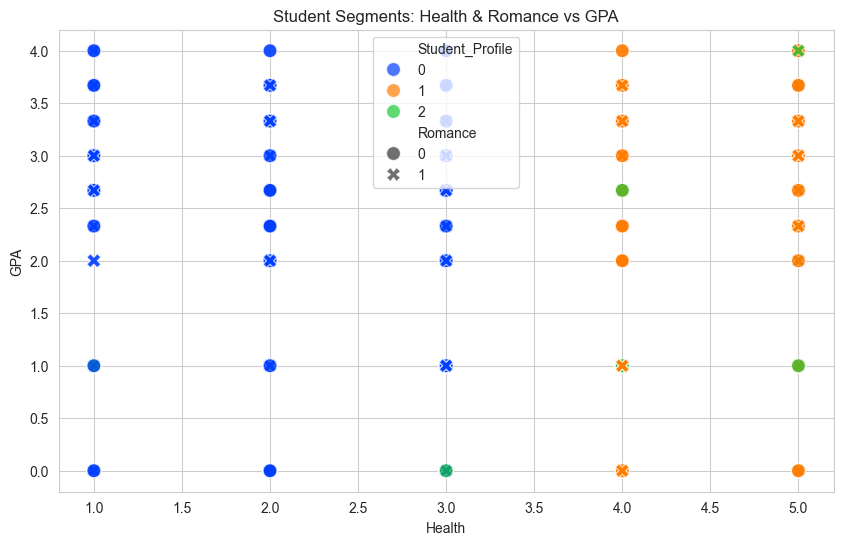


--- ИТОГОВЫЙ ОТЧЕТ ---
                      GPA  Romance_Rate   Alcohol
Student_Profile                                  
0                1.898832      0.372263  1.262774
1                1.761161      0.351613  1.241935
2                1.220615      0.430769  3.753846


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans

# 1. Загрузка данных
df = pd.read_csv('data/data_clean/student_portuguese_clean.csv')

# Выбираем факторы, включая отношения
cols = ['health', 'romantic_relationship', 'weekday_alcohol', 'study_time_<2 hours', 'final_grade']
data = df[cols].copy()
data.columns = ['Health', 'Romance', 'Alcohol', 'LowStudyTime', 'GPA']

# 2. Подготовка данных
# Кодируем отношения: yes -> 1, no -> 0
if data['Romance'].dtype == 'object':
    data['Romance'] = data['Romance'].map({'yes': 1, 'no': 0})

# --- 3. ВИЗУАЛИЗАЦИИ ---
sns.set_style("whitegrid")
# Увеличиваем количество графиков до 4, чтобы добавить влияние отношений
fig, axes = plt.subplots(1, 4, figsize=(26, 6))

# 1. Тепловая карта корреляций
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', fmt='.2f', ax=axes[0])
axes[0].set_title('1. Correlation Matrix')

# 2. Влияние алкоголя
sns.violinplot(x='Alcohol', y='GPA', data=data, palette='muted', ax=axes[1])
axes[1].set_title('2. Alcohol vs GPA')

# 3. Время на учебу
sns.boxplot(x='LowStudyTime', y='GPA', data=data, palette='Set2', ax=axes[2])
axes[2].set_title('3. Low Study Time impact')

# 4. НОВОЕ: Влияние романтических отношений на оценки
sns.boxplot(x='Romance', y='GPA', data=data, palette='Pastel1', ax=axes[3])
axes[3].set_xticklabels(['No Romance', 'In Romance'])
axes[3].set_title('4. Romance Impact on GPA')

plt.tight_layout()
plt.show()

# --- 4. МАШИННОЕ ОБУЧЕНИЕ ---

# Decision Tree (Дерево решений)
X = data.drop('GPA', axis=1)
y = data['GPA']

dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X, y)

plt.figure(figsize=(20, 8))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, precision=2, fontsize=10)
plt.title("Decision Tree: Hierarchy of Success (Including Romance)")
plt.show()

# K-Means (Кластеризация)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Student_Profile'] = kmeans.fit_predict(X)

# Визуализация кластеров (Связь здоровья, отношений и оценок через цвет)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Health', y='GPA', hue='Student_Profile',
                style='Romance', palette='bright', s=100, alpha=0.7)
plt.title("Student Segments: Health & Romance vs GPA")
plt.show()

# Вывод отчета с учетом отношений
print("\n--- ИТОГОВЫЙ ОТЧЕТ ---")
summary = data.groupby('Student_Profile').agg({
    'GPA': 'mean',
    'Romance': 'mean', # Покажет процент студентов в отношениях в каждом кластере
    'Alcohol': 'mean'
}).rename(columns={'Romance': 'Romance_Rate'})

print(summary)

/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/3473594086.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Total_Alcohol', y='GPA', data=final_data, palette='Reds')
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/3473594086.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(ax=axes[2], x='Romance', y='GPA', data=final_data, palette='husl', size=4)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.fr

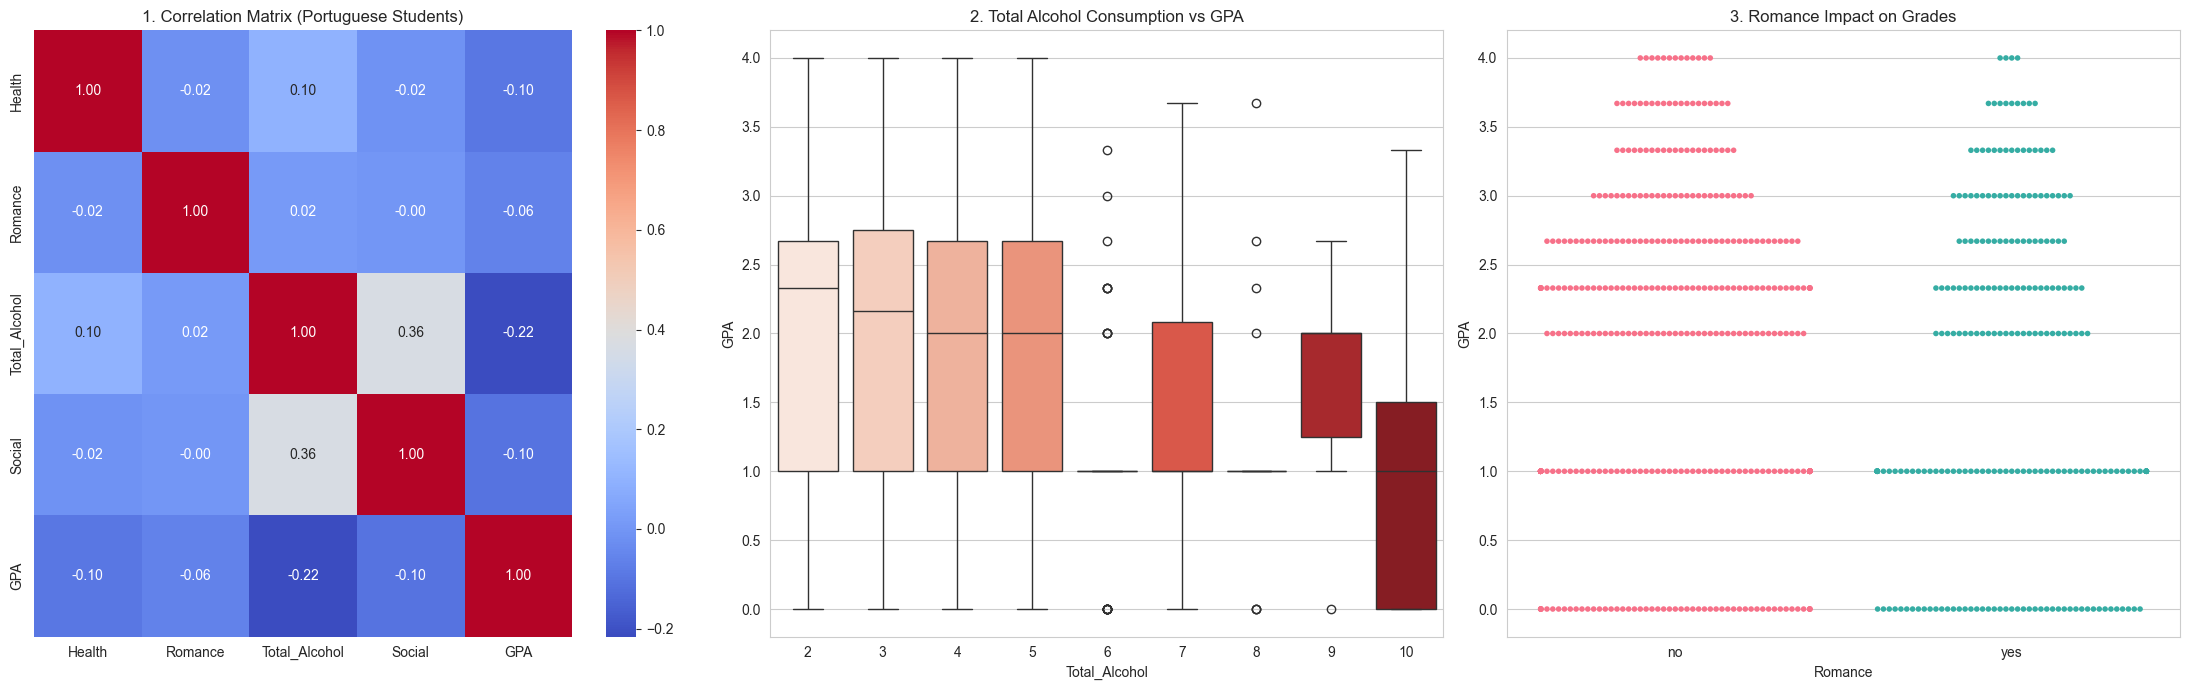

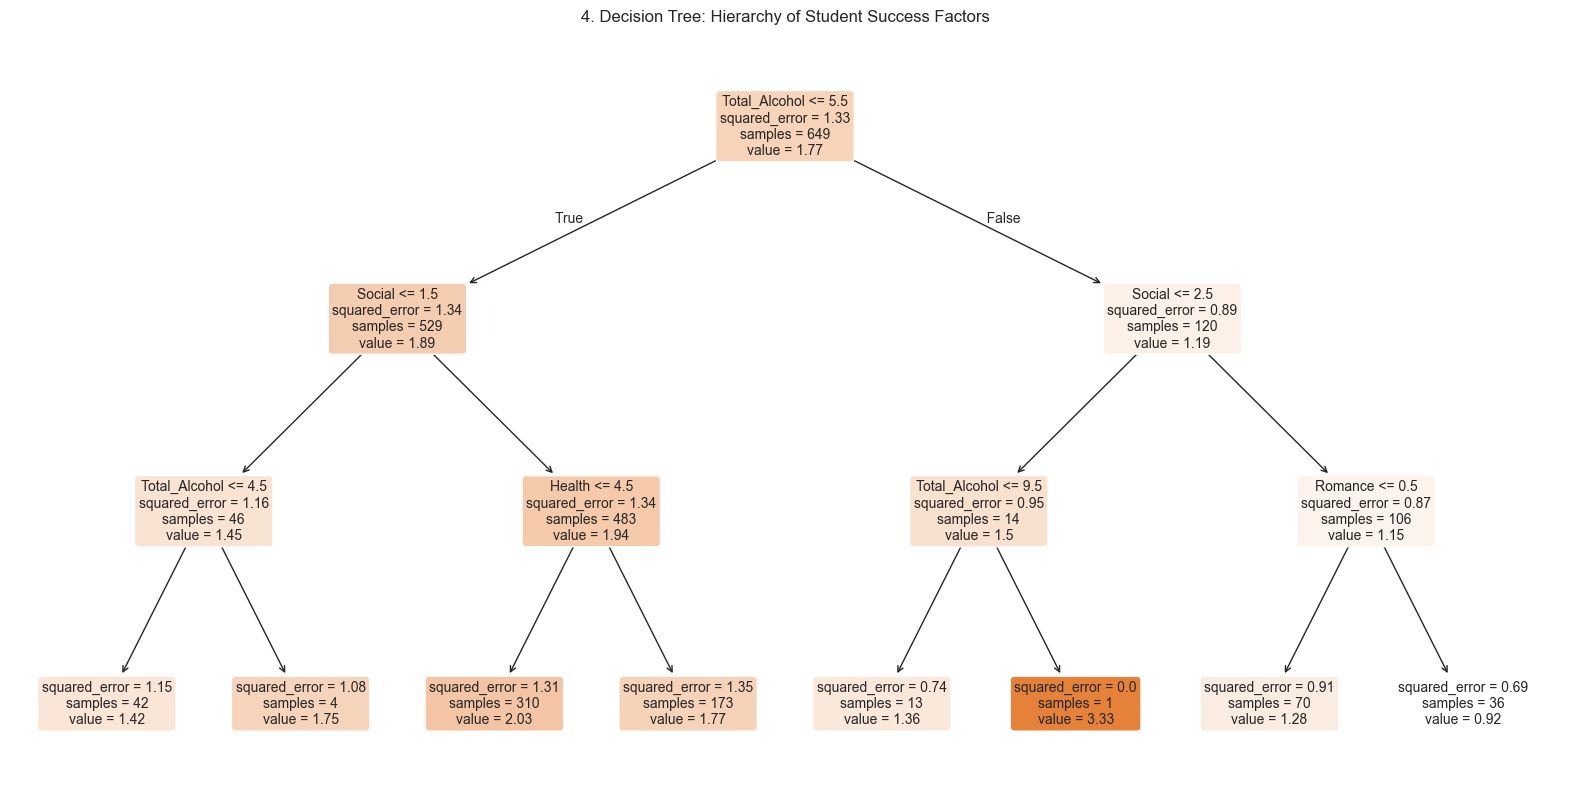

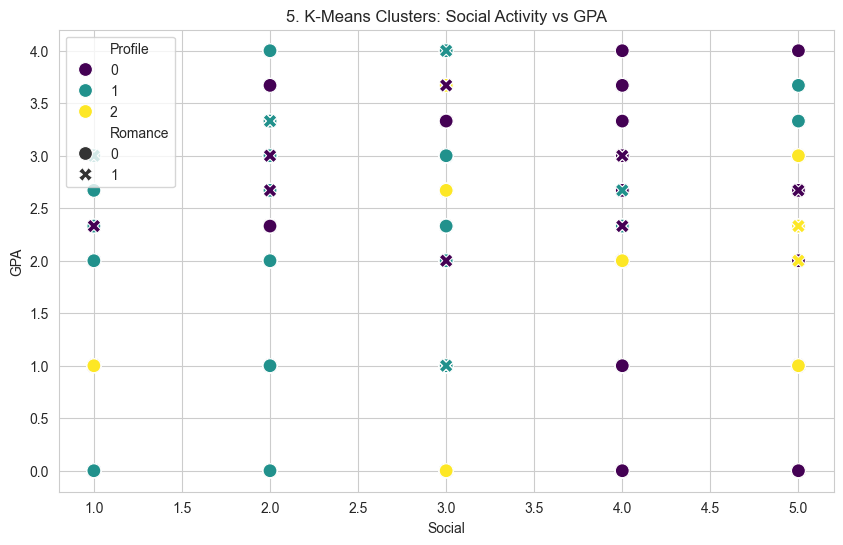

Средний балл по выявленным кластерам:
Profile
0    1.985678
1    1.849315
2    1.323212
Name: GPA, dtype: float64


In [4]:
# 1. ЗАГРУЗКА ДАННЫХ
# Используем твой один файл
df = pd.read_csv('data/data_clean/student_portuguese_clean.csv')

# Выбираем релевантные колонки из файла
# 'social' - уровень общения, 'health' - здоровье, 'romantic_relationship' - отношения
# 'weekday_alcohol' и 'weekend_alcohol' - потребление алкоголя
data = df[['health', 'romantic_relationship', 'weekday_alcohol', 'weekend_alcohol', 'social', 'final_grade']].copy()

# Создаем агрегированные показатели, как в твоем прошлом коде
data['Total_Alcohol'] = data['weekday_alcohol'] + data['weekend_alcohol']
data.columns = ['Health', 'Romance', 'Weekday_Alc', 'Weekend_Alc', 'Social', 'GPA', 'Total_Alcohol']

# Оставляем только нужные для анализа колонки
final_data = data[['Health', 'Romance', 'Total_Alcohol', 'Social', 'GPA']].copy()

# Кодирование текстовых признаков (Romance: yes/no -> 1/0)
le = LabelEncoder()
data_num = final_data.copy()
for col in data_num.columns:
    if data_num[col].dtype == 'object':
        data_num[col] = le.fit_transform(data_num[col].astype(str))

# --- 2. ПЕРВЫЕ 3 ВИЗУАЛИЗАЦИИ (Статистика) ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
sns.set_style("whitegrid")

# 1. Матрица корреляции
sns.heatmap(ax=axes[0], data=data_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
axes[0].set_title('1. Correlation Matrix (Portuguese Students)')

# 2. Boxplot: Влияние суммарного алкоголя на оценки
sns.boxplot(ax=axes[1], x='Total_Alcohol', y='GPA', data=final_data, palette='Reds')
axes[1].set_title('2. Total Alcohol Consumption vs GPA')

# 3. Swarmplot: Отношения и успеваемость
sns.swarmplot(ax=axes[2], x='Romance', y='GPA', data=final_data, palette='husl', size=4)
axes[2].set_title('3. Romance Impact on Grades')

plt.tight_layout()
plt.show()

# --- 3. ЕЩЕ 2 ВИЗУАЛИЗАЦИИ (Алгоритмы Data Mining) ---

# 4. Decision Tree (Дерево решений)
X = data_num.drop('GPA', axis=1)
y = data_num['GPA']
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X, y)



plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10, precision=2)
plt.title("4. Decision Tree: Hierarchy of Student Success Factors")
plt.show()

# 5. K-Means (Кластеризация)
# Делим студентов на 3 группы по социальному поведению и потреблению алкоголя
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_num['Profile'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_num, x='Social', y='GPA', hue='Profile', palette='viridis', s=100, style='Romance')
plt.title("5. K-Means Clusters: Social Activity vs GPA")
plt.show()

# Вывод краткого отчета
print("Средний балл по выявленным кластерам:")
print(data_num.groupby('Profile')['GPA'].mean())

/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/2244079391.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Low/No', 'High/Yes'])
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/2244079391.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Low/No', 'High/Yes'])
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/2244079391.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Low/No', 'High/Yes'])
/var/folders/mk/qm7qlrbd10z3xcntsfsrt1080000gn/T/ipykernel_14728/2244079391.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

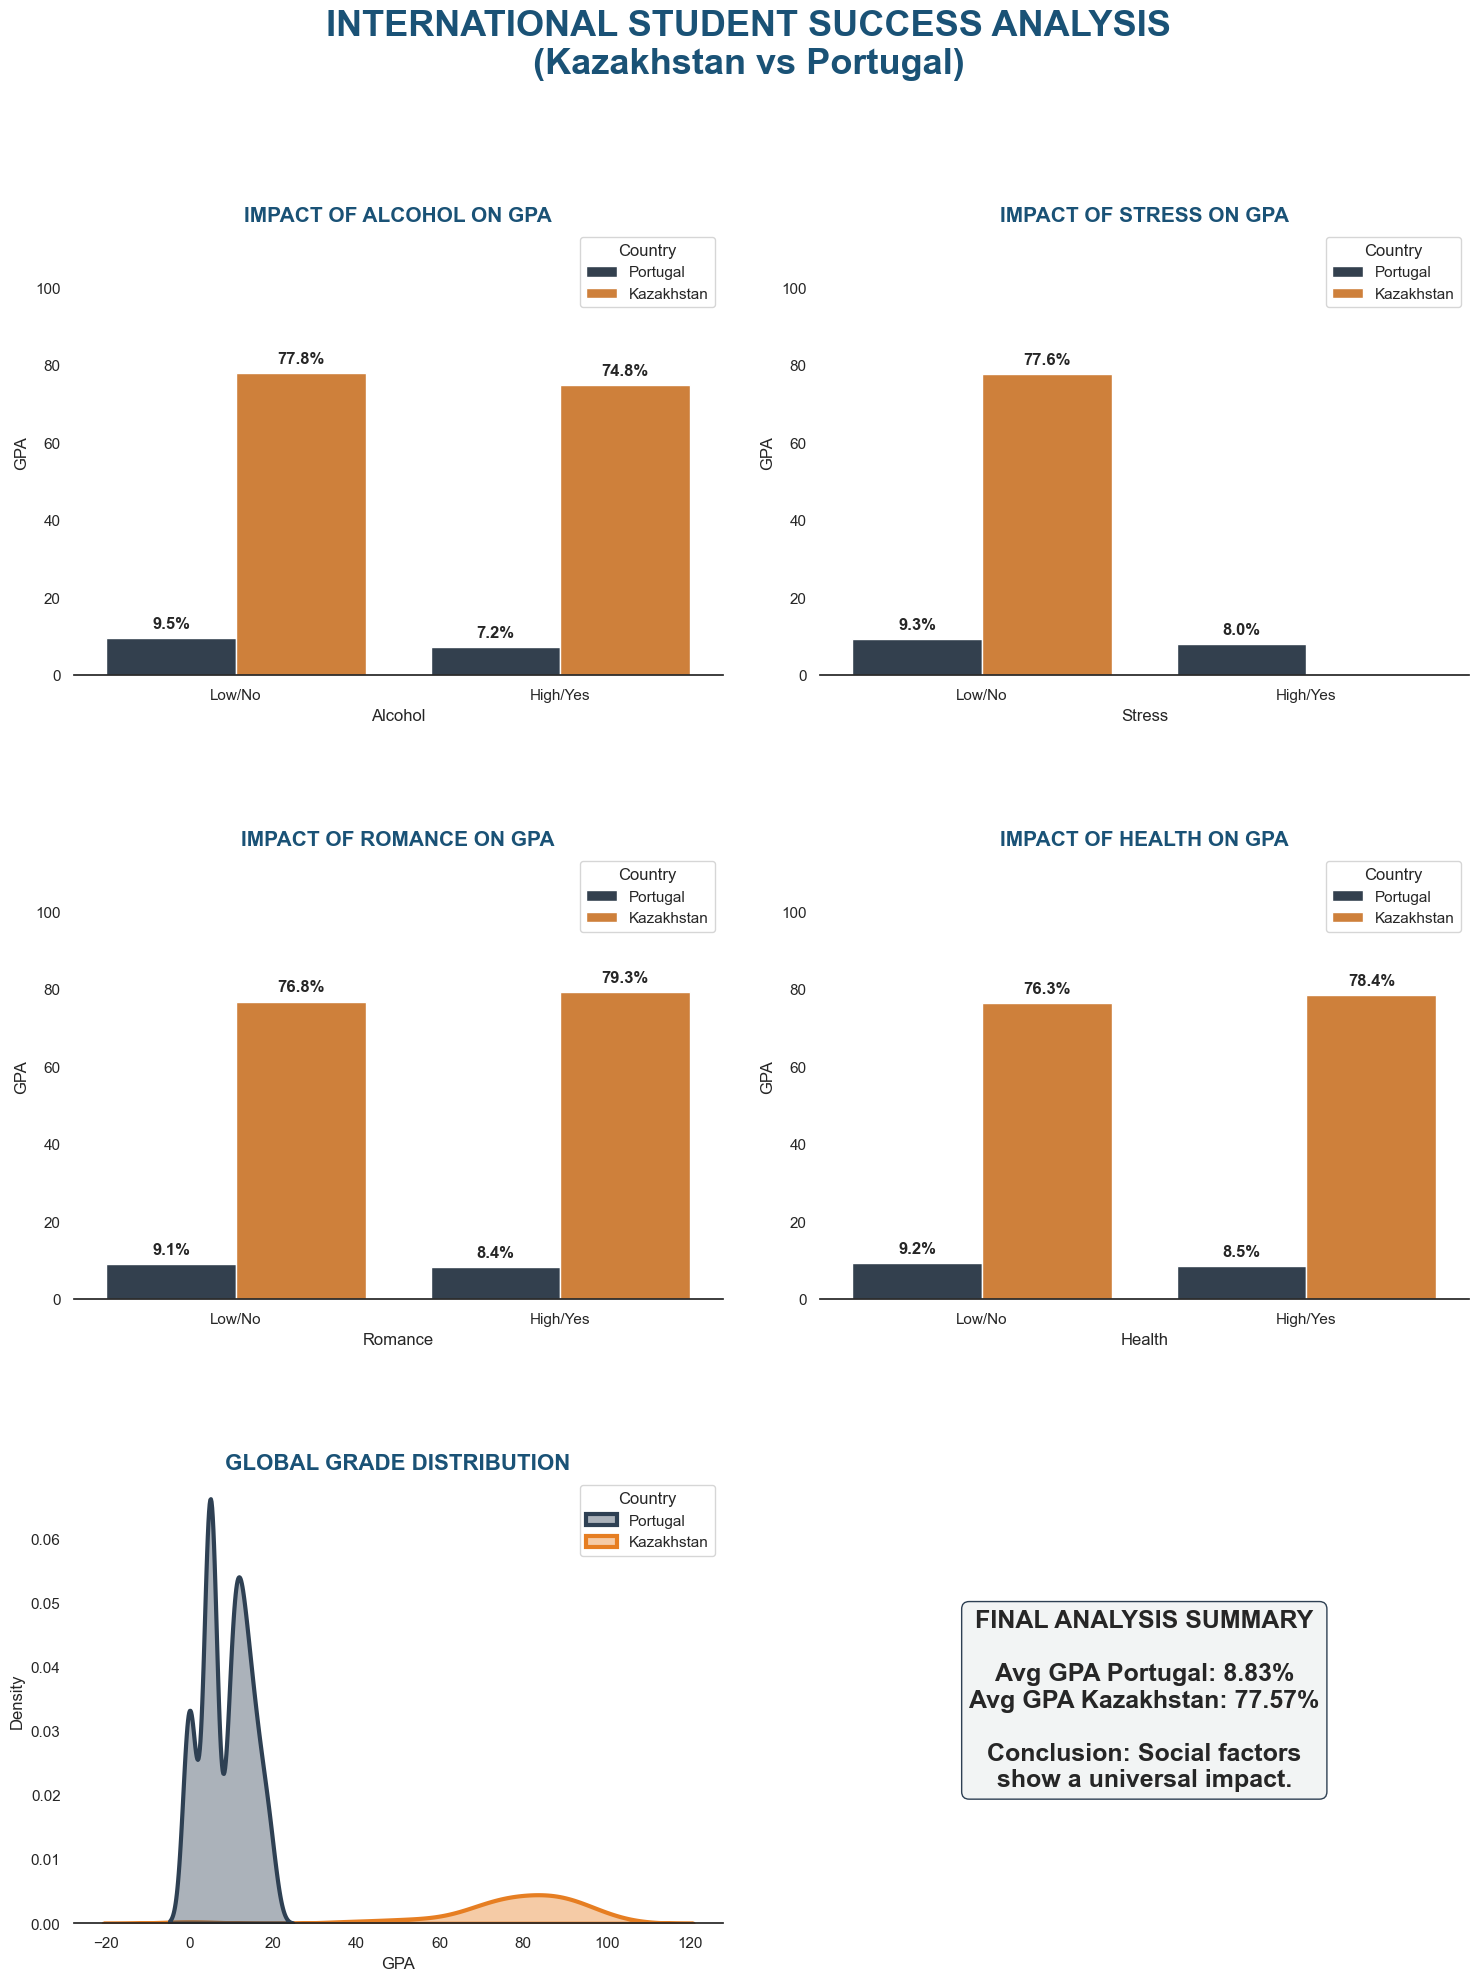

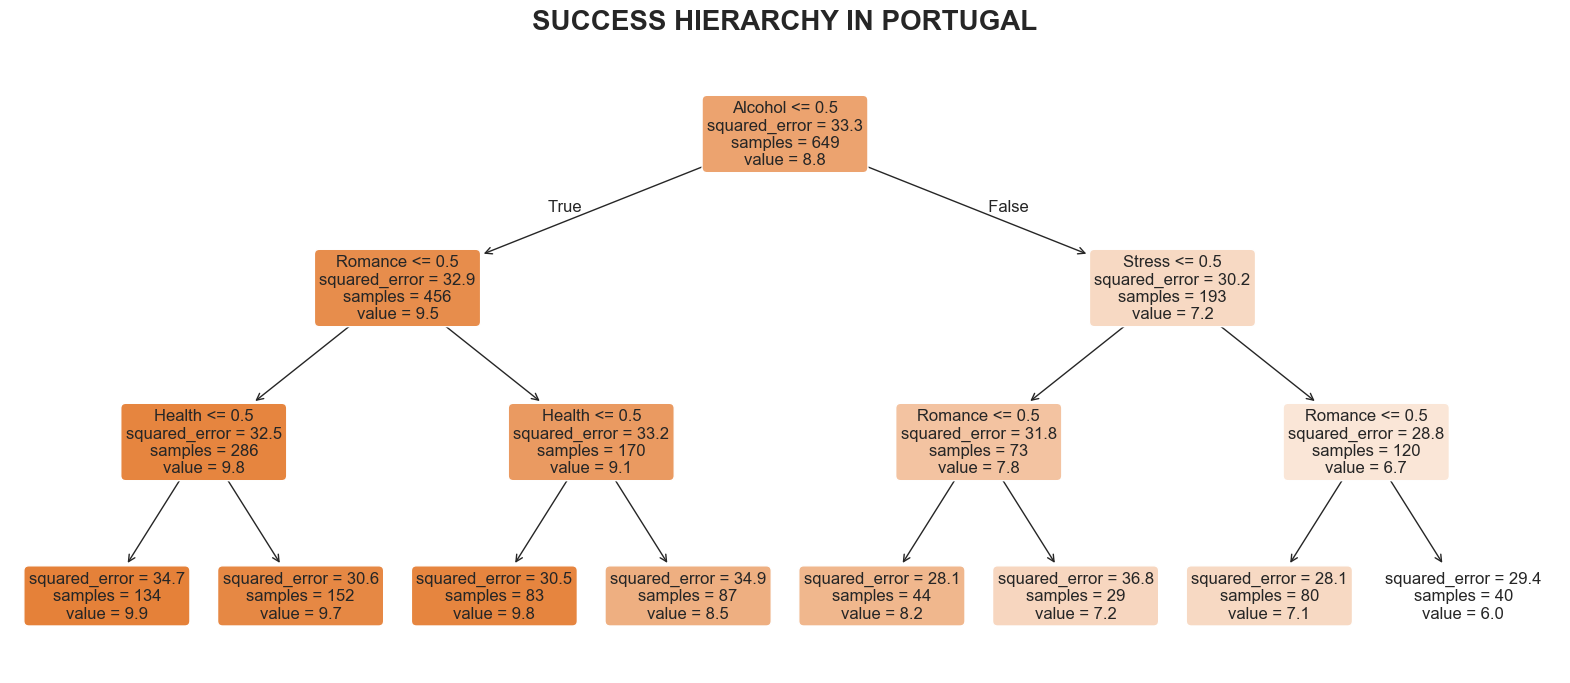

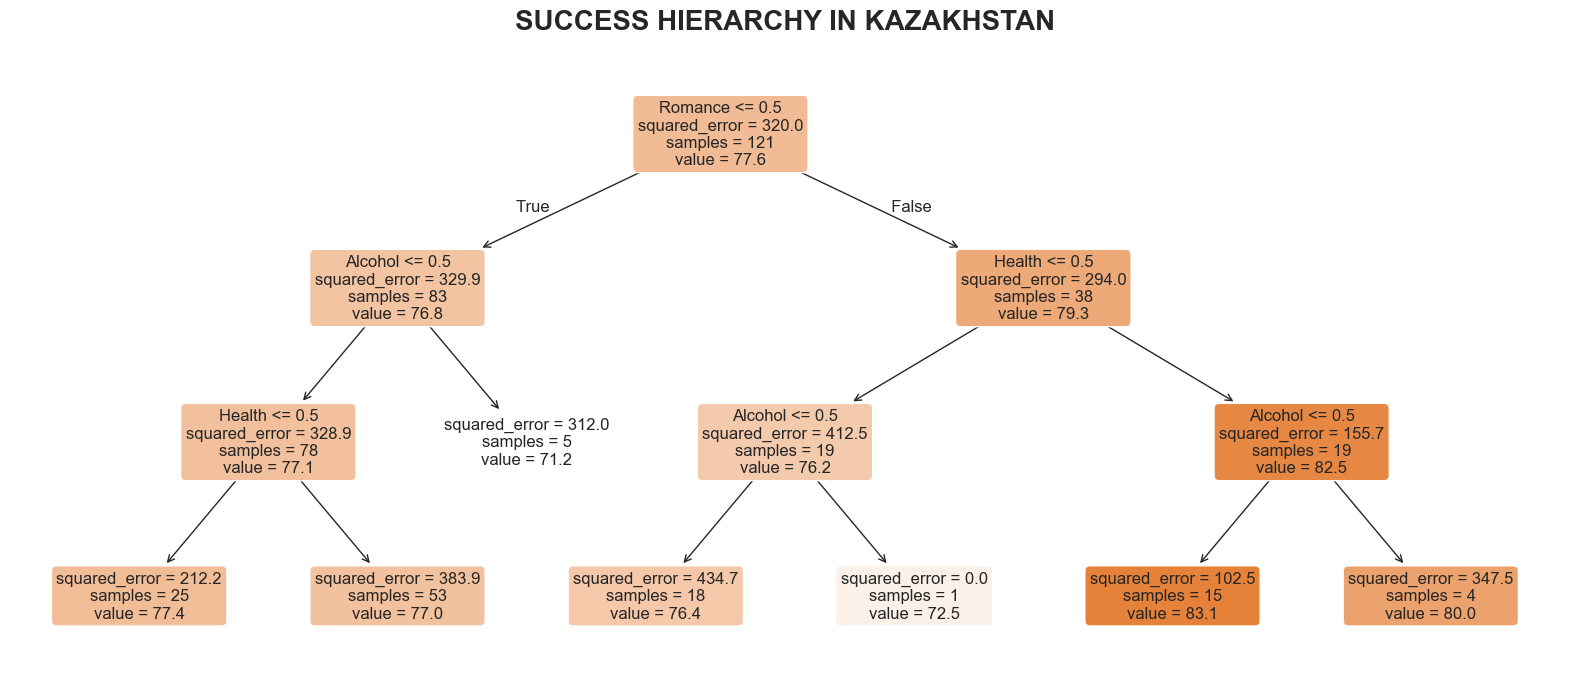

In [6]:
# --- 1. ПОДГОТОВКА И НОРМАЛИЗАЦИЯ ДАННЫХ ---
df_pt = pd.read_csv('data/data_clean/student_portuguese_clean.csv')
df_kz = pd.read_csv('data/data_clean/kz_data_en_clean.csv')

# Приводим Португалию к единому стандарту
pt = pd.DataFrame()
pt['GPA'] = (df_pt['final_grade'] / 20) * 100
pt['Alcohol'] = (df_pt['weekday_alcohol'] + df_pt['weekend_alcohol']).apply(lambda x: 1 if x > 4 else 0)
pt['Stress'] = df_pt['social'].apply(lambda x: 1 if x > 3 else 0)
pt['Romance'] = df_pt['romantic_relationship'].map({'yes': 1, 'no': 0})
pt['Health'] = df_pt['health'].apply(lambda x: 1 if x > 3 else 0)
pt['Country'] = 'Portugal'

# Приводим Казахстан к единому стандарту
kz = pd.DataFrame()
kz['GPA'] = (df_kz['gpa'] / 4.0) * 100
kz['Alcohol'] = df_kz['alcohol_consumption'].map({'Never': 0, 'Rarely': 0, 'Sometimes': 1, 'Frequently': 1, 'Always': 1}).fillna(0)
kz['Stress'] = df_kz['academic_stress'].apply(lambda x: 1 if x > 3 else 0)
kz['Romance'] = df_kz['romantic_relationship'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).fillna(0)
kz['Health'] = df_kz['health_status'].apply(lambda x: 1 if x > 3 else 0)
kz['Country'] = 'Kazakhstan'

combined = pd.concat([pt, kz]).dropna()

# --- 2. ПРОФЕССИОНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ (СРАВНЕНИЕ) ---
sns.set_theme(style="white")
fig, axes = plt.subplots(3, 2, figsize=(18, 22))
plt.subplots_adjust(hspace=0.4, wspace=0.15)
axes = axes.flatten()

colors = ["#2E4053", "#E67E22"]
features = ['Alcohol', 'Stress', 'Romance', 'Health']
labels = {0: 'Low/Poor', 1: 'High/Good'}

for i, feature in enumerate(features):
    sns.barplot(ax=axes[i], x=feature, y='GPA', hue='Country', data=combined, palette=colors, errorbar=None)

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', padding=5, fontweight='bold')

    axes[i].set_title(f'IMPACT OF {feature.upper()} ON GPA', fontsize=15, fontweight='black', color='#1A5276')
    axes[i].set_xticklabels(['Low/No', 'High/Yes'])
    axes[i].set_ylim(0, 115)
    sns.despine(left=True)

# Сравнительная плотность (KDE Plot)
sns.kdeplot(ax=axes[4], data=combined, x='GPA', hue='Country', fill=True, palette=colors, alpha=0.4, linewidth=3)
axes[4].set_title('GLOBAL GRADE DISTRIBUTION', fontsize=16, fontweight='black', color='#1A5276')

# Итоговое резюме
axes[5].axis('off')
summary = combined.groupby('Country')['GPA'].mean().round(2)
text_box = f"FINAL ANALYSIS SUMMARY\n\nAvg GPA Portugal: {summary['Portugal']}%\nAvg GPA Kazakhstan: {summary['Kazakhstan']}%\n\nConclusion: Social factors\nshow a universal impact."
axes[5].text(0.5, 0.5, text_box, fontsize=18, fontweight='bold', ha='center', va='center', bbox=dict(boxstyle="round", fc='#F2F4F4', ec='#2E4053'))

plt.suptitle('INTERNATIONAL STUDENT SUCCESS ANALYSIS\n(Kazakhstan vs Portugal)', fontsize=26, fontweight='black', color='#1A5276', y=0.98)
plt.show()

# --- 3. ДОБАВЛЯЕМ ДЕРЕВО РЕШЕНИЙ (DECISION TREE) ДЛЯ СТРАН ---
for country in ['Portugal', 'Kazakhstan']:
    subset = combined[combined['Country'] == country]
    X = subset[['Alcohol', 'Stress', 'Romance', 'Health']]
    y = subset['GPA']

    dt = DecisionTreeRegressor(max_depth=3, random_state=42)
    dt.fit(X, y)

    plt.figure(figsize=(20, 8))
    plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, precision=1, fontsize=12)
    plt.title(f"SUCCESS HIERARCHY IN {country.upper()}", fontsize=20, fontweight='bold', pad=20)
    plt.show()